First few rows of the dataset:
        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  

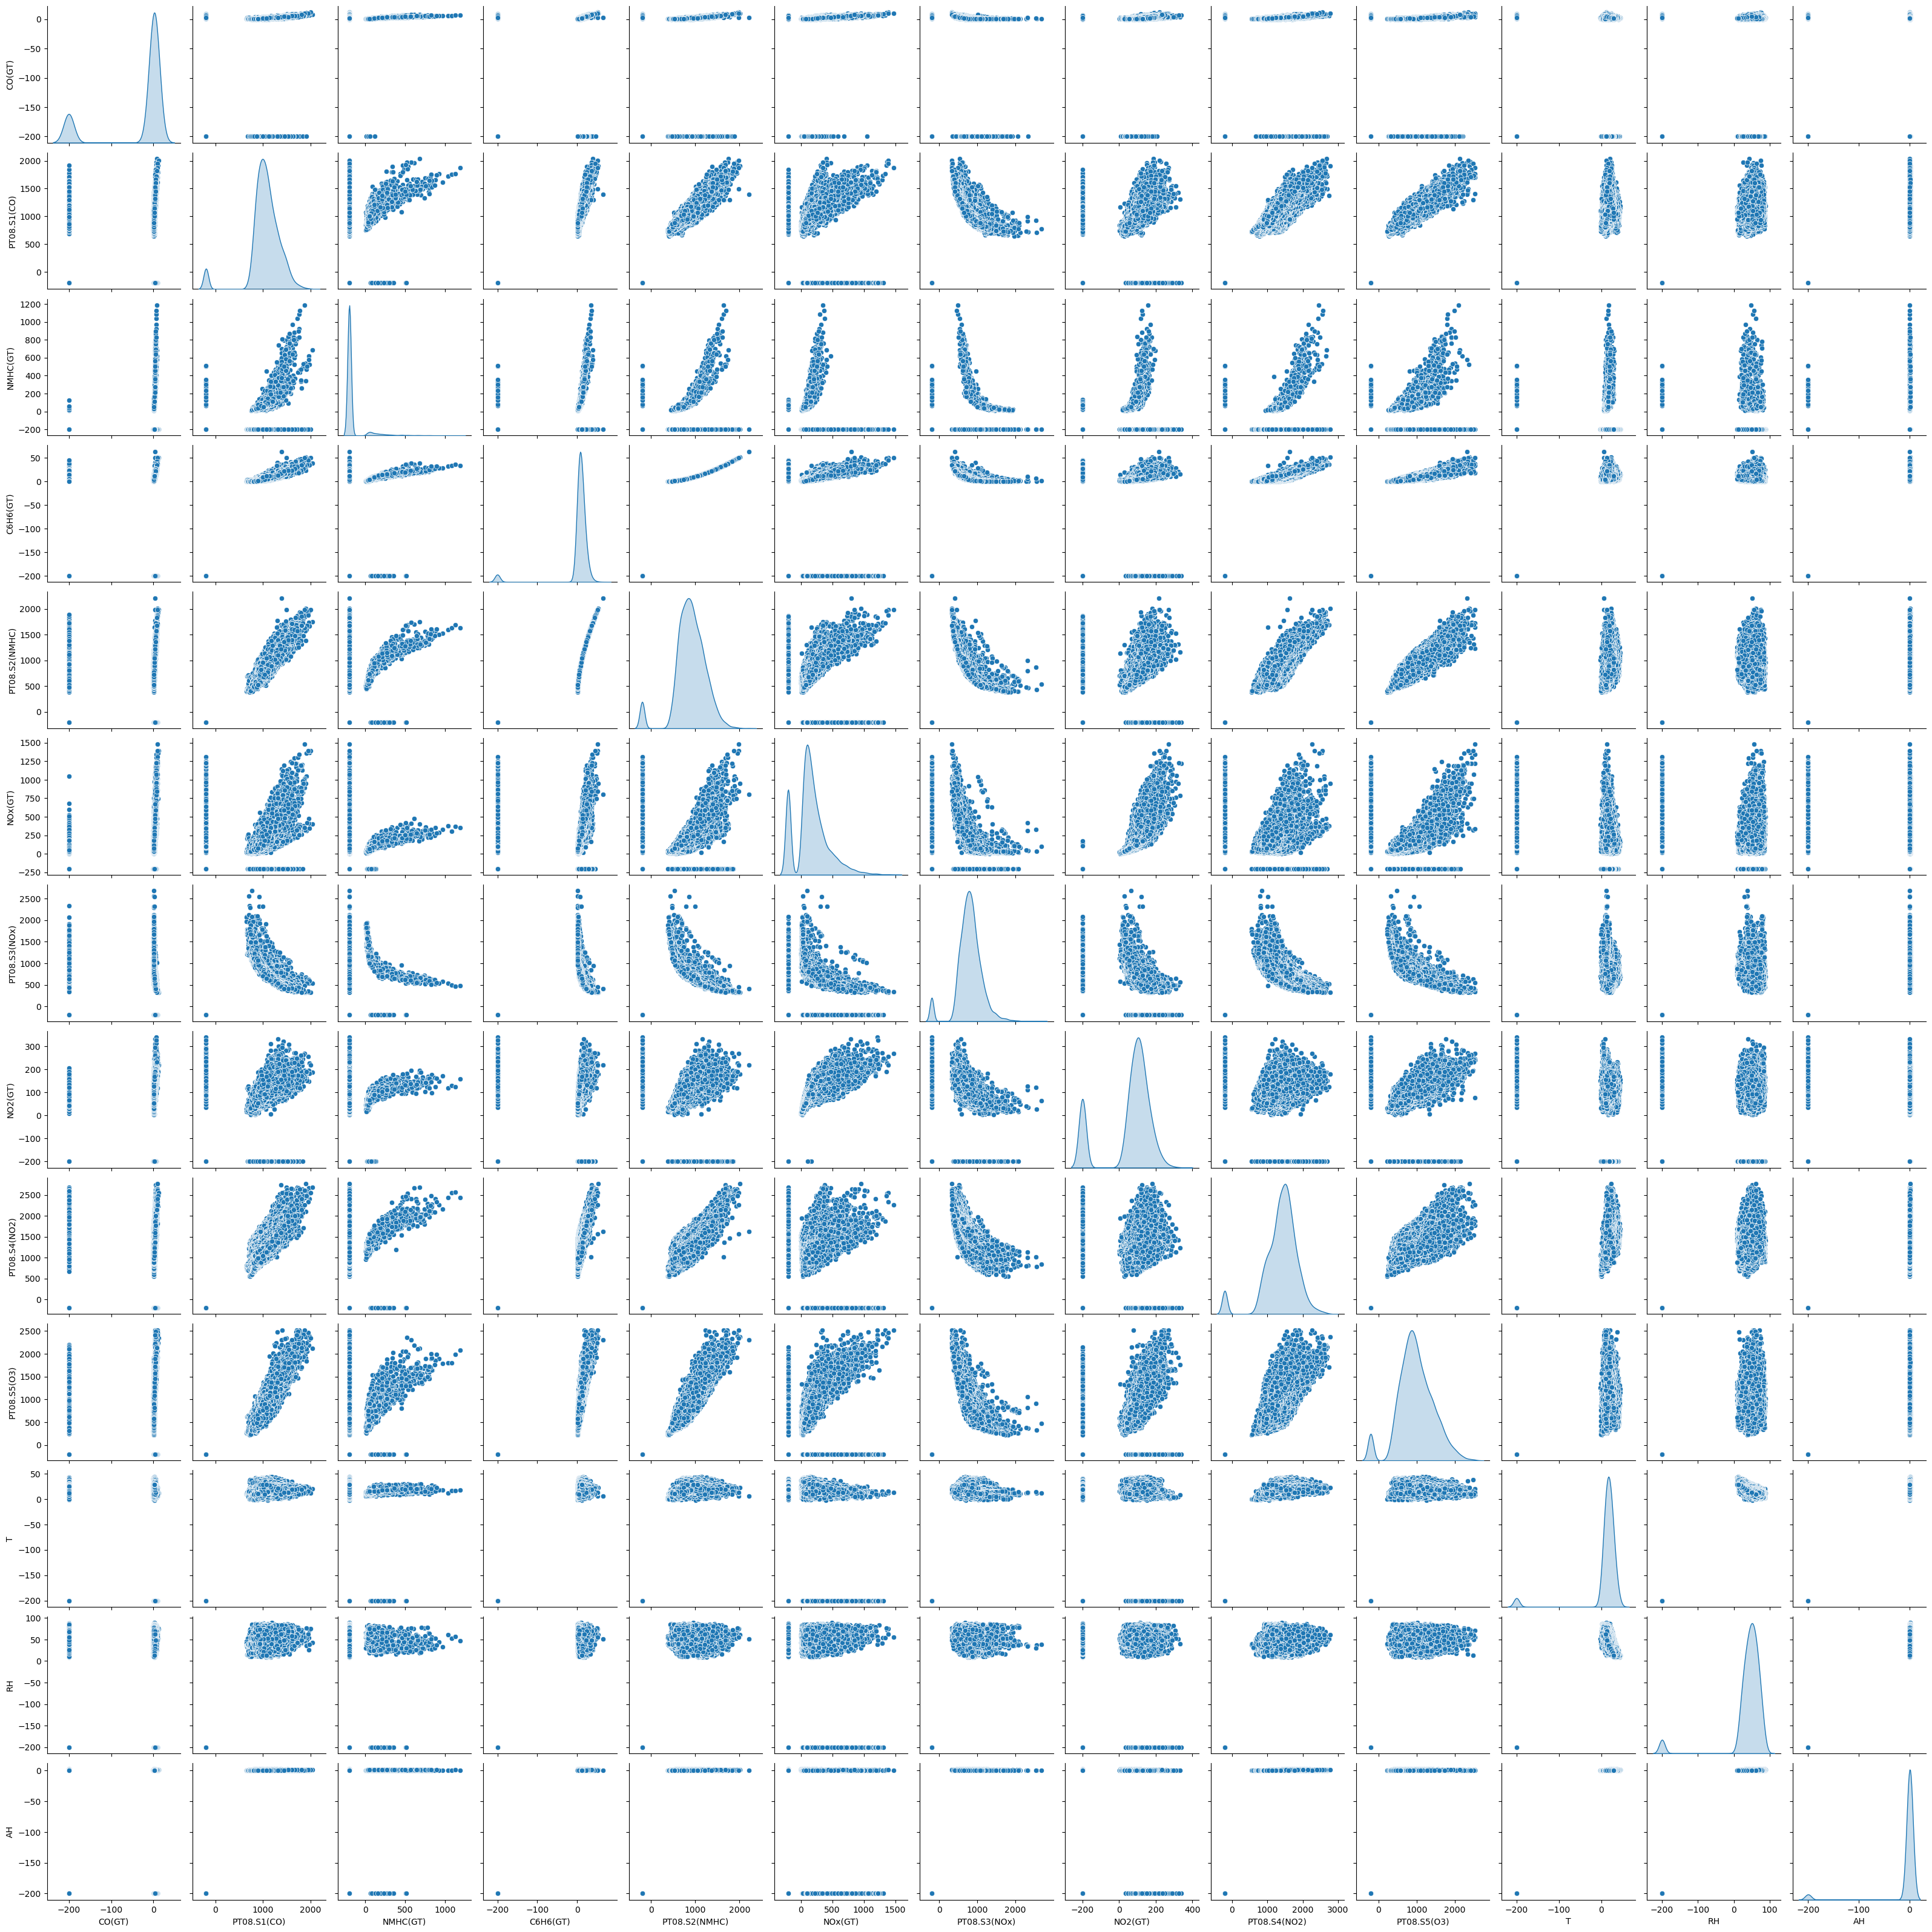

Mean Squared Error: 9.070442519892872


C:\Users\yashw\AppData\Local\Temp\ipykernel_22492\2868873742.py:147: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap=sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


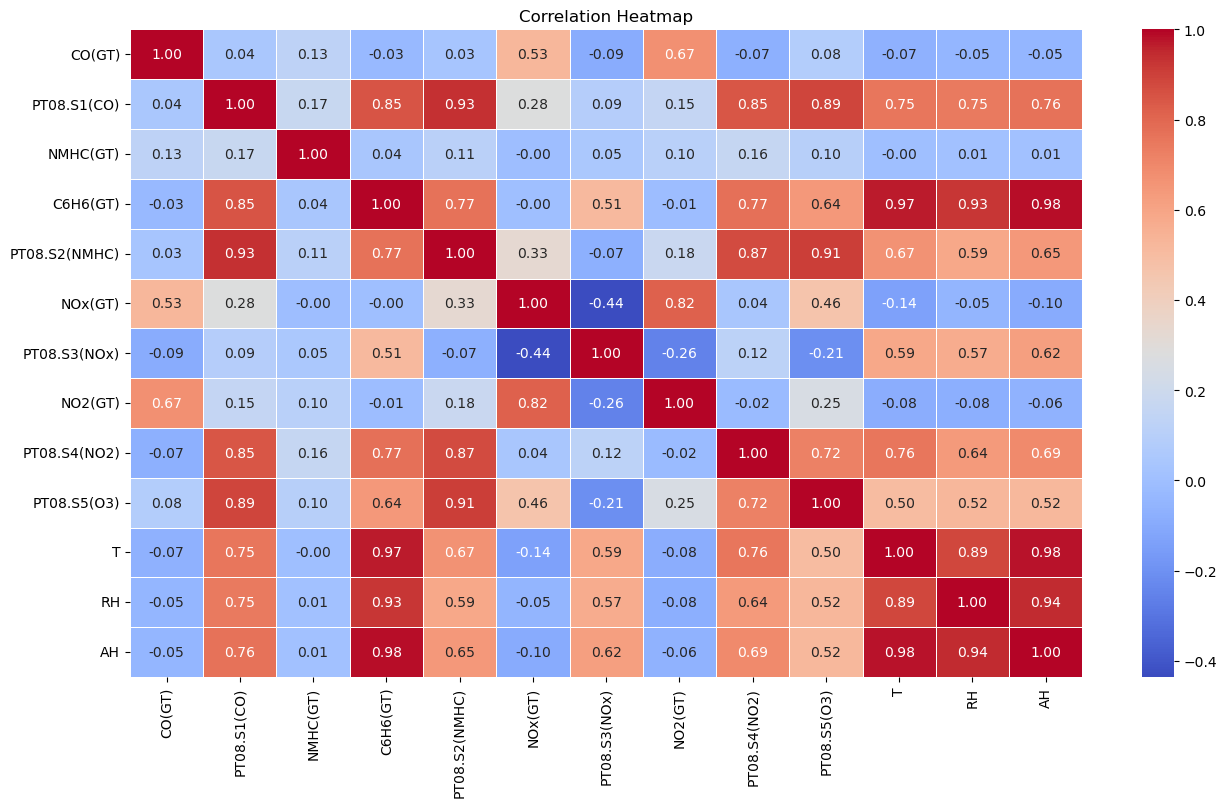

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Load the dataset
data = pd.read_excel("AirQualityUCI.xlsx")

# Exploratory Data Analysis (EDA)
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head(5))

# Summary statistics of the dataset
print("Summary statistics of the dataset:")
print(data.describe())

# Check for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

# Data visualization

# Scatter plots
pairplot=sns.pairplot(data, diag_kind='kde')
plt.show()

# Split the dataset into features and target variable
X = data.drop(['Date','Time','T'], axis=1)
y = data['T']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# GUI Interface
def predict_air_quality():
    values = {
        'CO(GT)': float(entry1.get()),
        'PT08.S1(CO)': float(entry2.get()),
        'NMHC(GT)': float(entry3.get()),
        'C6H6(GT)': float(entry4.get()),
        'PT08.S2(NMHC)': float(entry5.get()),
        'NOx(GT)': float(entry6.get()),
        'PT08.S3(NOx)': float(entry7.get()),
        'NO2(GT)': float(entry8.get()),
        'PT08.S4(NO2)': float(entry9.get()),
        'PT08.S5(O3)': float(entry10.get()),
        'RH': float(entry11.get()),
        'AH': float(entry11.get())
    }
    input_data = pd.DataFrame([values])
    prediction = model.predict(input_data)
    messagebox.showinfo("Prediction", f"The predicted air quality is: {prediction[0]}")

# Create the GUI window
window = tk.Tk()
window.title("Air Quality Prediction")
window.geometry("400x400")

# Create labels
lb=tk.Label(window,text="Air Quality Predictions")
lb.config(font=("Helvetica", 15))
lb.pack(pady=10)

label1 = tk.Label(window, text="CO(GT):")
label1.pack()
entry1 = tk.Entry(window)
entry1.pack(pady=5)

label2 = tk.Label(window, text="PT08.S1(CO):")
label2.pack()
entry2 = tk.Entry(window)
entry2.pack(pady=5)

label3 = tk.Label(window, text="NMHC(GT):")
label3.pack()
entry3 = tk.Entry(window)
entry3.pack()

label4 = tk.Label(window, text="C6H6(GT):")
label4.pack()
entry4 = tk.Entry(window)
entry4.pack(pady=5)

label5 = tk.Label(window, text="PT08.S2(NMHC):")
label5.pack()
entry5 = tk.Entry(window)
entry5.pack(pady=5)

label6 = tk.Label(window, text="NOx(GT):")
label6.pack()
entry6 = tk.Entry(window)
entry6.pack(pady=5)

label7 = tk.Label(window, text="PT08.S3(NOx):")
label7.pack()
entry7 = tk.Entry(window)
entry7.pack(pady=5)

label8 = tk.Label(window, text="NO2(GT):")
label8.pack()
entry8 = tk.Entry(window)
entry8.pack(pady=5)

label9 = tk.Label(window, text="PT08.S4(NO2):")
label9.pack()
entry9 = tk.Entry(window)
entry9.pack(pady=5)

label10 = tk.Label(window, text="PT08.S5(O3):")
label10.pack()
entry10 = tk.Entry(window)
entry10.pack(pady=5)

label11 = tk.Label(window, text="RH :")
label11.pack()
entry11 = tk.Entry(window)
entry11.pack(pady=5)

label12 = tk.Label(window, text="AH :")
label12.pack()
entry12 = tk.Entry(window)
entry12.pack(pady=5)

# Correlation heatmap
def hm():
    new_window = tk.Toplevel(window)
    new_window.title("heatmaps")
    plt.figure(figsize=(10, 8))
    heatmap=sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    canvas = FigureCanvasTkAgg(heatmap.get_figure(), master=new_window)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)
# Predict button
predict_button = tk.Button(window, text="Predict", command=predict_air_quality)
predict_button.pack(pady=5)

plot_hm = ttk.Button(window, text="Plot heatmap", command=hm)
plot_hm.pack(pady=5)

from bs4 import BeautifulSoup
import requests

def get_weather():
    city = city_entry.get()
    url = f"https://www.weather-forecast.com/locations/{city}/forecasts/latest"
    
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, "html.parser")
        
        weather_conditions = soup.find("span", class_="phrase").text
        messagebox.showinfo("Weather Conditions", f"Weather conditions in {city.capitalize()}: {weather_conditions}")
        
    except requests.exceptions.RequestException as e:
        messagebox.showerror("Error", f"An error occurred: {str(e)}")



# City input label and entry
lb=tk.Label(window,text="Weather Conditions")
lb.config(font=("Helvetica", 16))
lb.place(x=10,y=30)
city_label = tk.Label(window, text="Enter city name:")
city_label.place(x=10,y=60)
city_entry = tk.Entry(window)
city_entry.place(x=10,y=90)

# Button to get weather conditions
get_weather_button = tk.Button(window, text="Get Weather", command=get_weather)
get_weather_button.place(x=10,y=120)


# Run the GUI window
window.mainloop()